# korea temperature dataset information

대한민국의 2005~2024 지상 기상청 관측 데이터

|한글 컬럼명	|영문 컬럼명|
|--|--|
지점	|region_number
지점명	|region_name
일시	|date
평균기온(°C)	|avg_temp
최저기온(°C)	|min_temp
최저기온 시각(hhmi)	|min_temp_time(hhmi)
최고기온(°C)	|max_temp
최고기온 시각(hhmi)	|max_temp_time(hhmi)
일강수량(mm)	|daily_rainfall(mm)
최대 순간 풍속(m/s)	|max_instant_wind_speed(m/s)
최대 순간 풍속 풍향(16방위)	|max_instant_wind_direction(16)
최대 순간풍속 시각(hhmi)	|max_instant_wind_time(hhmi)
최대 풍속(m/s)	|max_wind_speed(m/s)
최대 풍속 풍향(16방위)	|max_wind_direction(16)
최대 풍속 시각(hhmi)	|max_wind_time(hhmi)
평균 풍속(m/s)	|avg_wind_speed(m/s)
최소 상대습도(%)	|min_relative_humidity(%)
평균 상대습도(%)	|avg_relative_humidity(%)
합계 일조시간(hr)	|total_sunshine_hours(hr)
합계 일사량(MJ/m2)	|total_solar_radiation(MJ/m2)
일 최심신적설(cm)	|daily_max_new_snowfall(cm)
일 최심적설(cm)	|daily_max_snowfall(cm)
평균 전운량(1/10)	|avg_total_cloud_cover(1/10)
평균 중하층운량(1/10)	|avg_mid_low_cloud_cover(1/10)

# load weather dataset

날씨 데이터 불러오기

|파일명|형식|내용
|--|--|--|
|korea_temp_20050101-20141231|CSV|대한민국 지상 기상 관측 정보 (2005~2014)
|korea_temp_20150101-20241231|CSV|대한민국 지상 기상 관측 정보 (2015~2024)

In [1]:
import pandas as pd

In [3]:
# file_path1 : 2005.01.01 ~ 2014.12.31 대한민국 날씨 데이터
# file_path2 : 2015.01.01 ~ 2024.12.31 대한민국 날씨 데이터

file_path1 = '../data/korea_temp_20050101-20141231.csv'
file_path2 = '../data/korea_temp_20150101-20241231.csv'
df1 = pd.read_csv(file_path1, dtype={'최저기온 시각(hhmi)' : str,
                                     '최고기온 시각(hhmi)' : str,
                                     '최대 순간풍속 시각(hhmi)': str,
                                     '최대 풍속 시각(hhmi)' : str},
                                     encoding='cp949') # index_col = 날짜 컬럼
df2 = pd.read_csv(file_path2, dtype={'최저기온 시각(hhmi)' : str,
                                     '최고기온 시각(hhmi)' : str,
                                     '최대 순간풍속 시각(hhmi)': str,
                                     '최대 풍속 시각(hhmi)' : str}, encoding='cp949') # index_col = 날짜 컬럼

In [4]:
# 컬럼 일치 확인

print(df1.shape)
print(df2.shape)

(312413, 24)
(347632, 24)


# data Preprocessing

데이터 전처리

## data merge

데이터 병합

In [5]:
# 데이터 병합

df = pd.concat([df1, df2], ignore_index=True) # 인덱스를 재설정하여 중복 방지.
print(df.shape)

(660045, 24)


In [6]:
df.head(5)

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),...,최대 풍속 시각(hhmi),평균 풍속(m/s),최소 상대습도(%),평균 상대습도(%),합계 일조시간(hr),합계 일사량(MJ/m2),일 최심신적설(cm),일 최심적설(cm),평균 전운량(1/10),평균 중하층운량(1/10)
0,90,속초,2005-01-01,-2.4,-7.6,750,2.8,1438,NaN,6.9,...,518,2.3,19.0,31.4,7.8,NaN,NaN,2.5,0.3,0.3
1,90,속초,2005-01-02,2.9,-3.3,25,6.1,1358,NaN,16.1,...,1100,3.8,16.0,32.9,8.1,NaN,NaN,NaN,2.1,2.1
2,90,속초,2005-01-03,5.3,1.0,2400,9.8,1416,0.1,17.3,...,1200,4.2,19.0,43.9,2.9,NaN,NaN,NaN,6.0,5.1
3,90,속초,2005-01-04,-2.4,-5.9,2348,1.0,0,NaN,17.6,...,101,3.4,13.0,24.9,7.8,NaN,NaN,NaN,0.3,0.3
4,90,속초,2005-01-05,-2.3,-7.2,253,2.5,1407,NaN,5.9,...,1358,2.0,30.0,41.1,7.5,NaN,NaN,NaN,3.1,1.3


---

## change column names to english

In [7]:
df.columns

Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)', '최대 순간 풍속 풍향(16방위)',
       '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)', '최대 풍속 시각(hhmi)',
       '평균 풍속(m/s)', '최소 상대습도(%)', '평균 상대습도(%)', '합계 일조시간(hr)',
       '합계 일사량(MJ/m2)', '일 최심신적설(cm)', '일 최심적설(cm)', '평균 전운량(1/10)',
       '평균 중하층운량(1/10)'],
      dtype='object')

In [71]:
new_columns = ['region_number', 'region_name', 'date', 'avg_temp', 'min_temp', 'min_temp_time', 'max_temp',
               'max_temp_time', 'daily_rainfall', 'max_instant_wind_speed', 'max_instant_wind_direction',
               'max_instant_wind_time', 'max_wind_speed', 'max_wind_direction', 'max_wind_time',
               'avg_wind_speed', 'min_relative_humidity', 'avg_relative_humidity', 'total_sunshine_hours',
               'total_solar_radiation', 'daily_max_new_snowfall', 'daily_max_snowfall', 'avg_total_cloud_cover',
               'avg_mid_low_cloud_cover']

In [9]:
df.columns = new_columns

In [10]:
df.columns

Index(['region_number', 'region_name', 'date', 'avg_temp', 'min_temp',
       'min_temp_time(hhmi)', 'max_temp', 'max_temp_time(hhmi)',
       'daily_rainfall(mm)', 'max_instant_wind_speed(m/s)',
       'max_instant_wind_direction(16)', 'max_instant_wind_time(hhmi)',
       'max_wind_speed(m/s)', 'max_wind_direction(16)', 'max_wind_time(hhmi)',
       'avg_wind_speed(m/s)', 'min_relative_humidity(%)',
       'avg_relative_humidity(%)', 'total_sunshine_hours(hr)',
       'total_solar_radiation(MJ/m2)', 'daily_max_new_snowfall(cm)',
       'daily_max_snowfall(cm)', 'avg_total_cloud_cover(1/10)',
       'avg_mid_low_cloud_cover(1/10)'],
      dtype='object')

In [11]:
df.head(5)

,region_number,region_name,date,avg_temp,min_temp,min_temp_time(hhmi),max_temp,max_temp_time(hhmi),daily_rainfall(mm),max_instant_wind_speed(m/s),...,max_wind_time(hhmi),avg_wind_speed(m/s),min_relative_humidity(%),avg_relative_humidity(%),total_sunshine_hours(hr),total_solar_radiation(MJ/m2),daily_max_new_snowfall(cm),daily_max_snowfall(cm),avg_total_cloud_cover(1/10),avg_mid_low_cloud_cover(1/10)
0,90,속초,2005-01-01,-2.4,-7.6,750,2.8,1438,NaN,6.9,...,518,2.3,19.0,31.4,7.8,NaN,NaN,2.5,0.3,0.3
1,90,속초,2005-01-02,2.9,-3.3,25,6.1,1358,NaN,16.1,...,1100,3.8,16.0,32.9,8.1,NaN,NaN,NaN,2.1,2.1
2,90,속초,2005-01-03,5.3,1.0,2400,9.8,1416,0.1,17.3,...,1200,4.2,19.0,43.9,2.9,NaN,NaN,NaN,6.0,5.1
3,90,속초,2005-01-04,-2.4,-5.9,2348,1.0,0,NaN,17.6,...,101,3.4,13.0,24.9,7.8,NaN,NaN,NaN,0.3,0.3
4,90,속초,2005-01-05,-2.3,-7.2,253,2.5,1407,NaN,5.9,...,1358,2.0,30.0,41.1,7.5,NaN,NaN,NaN,3.1,1.3


---

## add 'region' column

In [12]:
# 행정구역 정보가 있는 데이터 불러오기

region_data = pd.read_csv('../data/region.csv')
region_data.head(5)

,region,region_name,region_number
0,강원특별자치도,강릉,105.0
1,강원특별자치도,대관령,100.0
2,강원특별자치도,동해,106.0
3,강원특별자치도,북강릉,104.0
4,강원특별자치도,북춘천,93.0


In [13]:
# 결측값 확인

region_data.isna().sum()

region           52
region_name      51
region_number    51
dtype: int64

In [14]:
# 결측치 제거: dropna()

# region_data에서 region_number와 region 두 컬럼에 모두 결측값이 앴는 행을 삭제
region_data.dropna(subset=['region_number', 'region'], inplace=True)
region_data.isna().sum()

region           0
region_name      0
region_number    0
dtype: int64

In [15]:
# 데이터 병합의 기준이 되는 두 컬럼의 데이터형식 확인

print(df['region_number'].dtypes)
print(region_data['region_number'].dtypes)

int64
float64


In [16]:
# 행정구역명과 총 개수 확인

print(region_data['region'].unique())
print(len(region_data['region'].unique()))

['강원특별자치도' '경기도' '경상남도' '경상북도' '광주광역시' '대구광역시' '대전광역시' '부산광역시' '서울특별시'
 '세종특별자치시' '울산광역시' '인천광역시' '전라남도' '진도' '전북특별자치도' '제주특별자치도' '충청남도' '충청북도']
18


In [17]:
# 데이터 병합: pd.merge()

df_m = pd.merge(df, # 병합의 기준이 되는 첫 번째(왼쪽) 데이터
                region_data[["region", "region_number"]],  # 병합할 두 번째(오른쪽) 데이터
                on='region_number',  # 기준 컬럼
                how='left' # 왼쪽 데이터를 기준으로 병합
                )

In [18]:
df_m.head(5)

,region_number,region_name,date,avg_temp,min_temp,min_temp_time(hhmi),max_temp,max_temp_time(hhmi),daily_rainfall(mm),max_instant_wind_speed(m/s),...,avg_wind_speed(m/s),min_relative_humidity(%),avg_relative_humidity(%),total_sunshine_hours(hr),total_solar_radiation(MJ/m2),daily_max_new_snowfall(cm),daily_max_snowfall(cm),avg_total_cloud_cover(1/10),avg_mid_low_cloud_cover(1/10),region
0,90,속초,2005-01-01,-2.4,-7.6,750,2.8,1438,NaN,6.9,...,2.3,19.0,31.4,7.8,NaN,NaN,2.5,0.3,0.3,강원특별자치도
1,90,속초,2005-01-02,2.9,-3.3,25,6.1,1358,NaN,16.1,...,3.8,16.0,32.9,8.1,NaN,NaN,NaN,2.1,2.1,강원특별자치도
2,90,속초,2005-01-03,5.3,1.0,2400,9.8,1416,0.1,17.3,...,4.2,19.0,43.9,2.9,NaN,NaN,NaN,6.0,5.1,강원특별자치도
3,90,속초,2005-01-04,-2.4,-5.9,2348,1.0,0,NaN,17.6,...,3.4,13.0,24.9,7.8,NaN,NaN,NaN,0.3,0.3,강원특별자치도
4,90,속초,2005-01-05,-2.3,-7.2,253,2.5,1407,NaN,5.9,...,2.0,30.0,41.1,7.5,NaN,NaN,NaN,3.1,1.3,강원특별자치도


In [19]:
df_m.shape

(660045, 25)

## unmaped 'region' data

In [20]:
# 모든 데이터가 region.csv의 지자체명(region)과 병합되었는지 확인
print(df_m[df_m['region'].isnull()].shape)

# region컬럼에 데이터가 없는 일부 행이 있음을 확인.
print(df_m[df_m['region'].isnull()]['region_name'].unique())

(11914, 25)
['진도(첨찰산)' '대구(기)' '경주시' '북부산']


In [21]:
# 해당 지역명에 맞는 행정구역명을 딕셔너리로 매핑

region_map = {
    '진도(첨찰산)': '전라남도',
    '대구(기)': '대구광역시',
    '경주시': '경상북도',
    '북부산': '부산광역시'
}

In [22]:
# region_name 값이 region_map 딕셔너리의 키와 일치하는 경우 해당 값을 딕셔너리의 값으로 변경

df_m['region'] = df_m['region'].fillna(df_m['region_name'].map(region_map))

In [23]:
# 결과 확인
print(df_m[df_m['region'].isnull()].shape)
print(df_m[df_m['region'].isnull()]['region_name'].unique())

(0, 25)
[]


---

## missing value handling


In [75]:
# 결측값 확인

df_m.isnull().sum()

region_number                      0
region_name                        0
date                               0
avg_temp                         769
min_temp                         134
min_temp_time                    330
max_temp                         134
max_temp_time                    330
daily_rainfall                414018
max_instant_wind_speed           643
max_instant_wind_direction       643
max_instant_wind_time            635
max_wind_speed                   654
max_wind_direction               643
max_wind_time                    635
avg_wind_speed                   771
min_relative_humidity            489
avg_relative_humidity           1070
total_sunshine_hours            1501
total_solar_radiation         384363
daily_max_new_snowfall        650063
daily_max_snowfall            643704
avg_total_cloud_cover         247742
avg_mid_low_cloud_cover       257068
region                             0
dtype: int64

### remove missing values from temperature

In [76]:
df_c_t = df_m.dropna(subset=['min_temp', 'max_temp', 'min_temp_time', 'max_temp_time'])
df_c_t.isnull().sum()

region_number                      0
region_name                        0
date                               0
avg_temp                         433
min_temp                           0
min_temp_time                      0
max_temp                           0
max_temp_time                      0
daily_rainfall                413708
max_instant_wind_speed           341
max_instant_wind_direction       341
max_instant_wind_time            333
max_wind_speed                   353
max_wind_direction               343
max_wind_time                    335
avg_wind_speed                   464
min_relative_humidity            182
avg_relative_humidity            759
total_sunshine_hours            1211
total_solar_radiation         384032
daily_max_new_snowfall        649697
daily_max_snowfall            643338
avg_total_cloud_cover         247498
avg_mid_low_cloud_cover       256756
region                             0
dtype: int64

### replace missing values from 'avg_temp'

replace 'avg_temp' with the average of 'min_temp' and 'max_temp'

In [77]:
# avg_temp이 결측값인 행의 인덱스를 추출해서 결측값이 아닌 행에 영향이 가지 않도록 처리

idx = df_c_t[df_c_t['avg_temp'].isna()].index

df_c_t.loc[idx, 'avg_temp'] = (df_c_t.loc[idx, 'min_temp'] + df_c_t.loc[idx, 'max_temp']) / 2
df_c_t.isnull().sum()

region_number                      0
region_name                        0
date                               0
avg_temp                           0
min_temp                           0
min_temp_time                      0
max_temp                           0
max_temp_time                      0
daily_rainfall                413708
max_instant_wind_speed           341
max_instant_wind_direction       341
max_instant_wind_time            333
max_wind_speed                   353
max_wind_direction               343
max_wind_time                    335
avg_wind_speed                   464
min_relative_humidity            182
avg_relative_humidity            759
total_sunshine_hours            1211
total_solar_radiation         384032
daily_max_new_snowfall        649697
daily_max_snowfall            643338
avg_total_cloud_cover         247498
avg_mid_low_cloud_cover       256756
region                             0
dtype: int64

### replace missing values of 'daily_rainfall' with 0

In [78]:
df_c_tr = df_c_t.copy()
df_c_tr['daily_rainfall'] = df_c_tr['daily_rainfall'].fillna(0)
df_c_tr.isna().sum()

region_number                      0
region_name                        0
date                               0
avg_temp                           0
min_temp                           0
min_temp_time                      0
max_temp                           0
max_temp_time                      0
daily_rainfall                     0
max_instant_wind_speed           341
max_instant_wind_direction       341
max_instant_wind_time            333
max_wind_speed                   353
max_wind_direction               343
max_wind_time                    335
avg_wind_speed                   464
min_relative_humidity            182
avg_relative_humidity            759
total_sunshine_hours            1211
total_solar_radiation         384032
daily_max_new_snowfall        649697
daily_max_snowfall            643338
avg_total_cloud_cover         247498
avg_mid_low_cloud_cover       256756
region                             0
dtype: int64

### remove rows with less than 1,000 missing values

* 결측치 수량인 적은 데이터는 분석의 편의를 위해 제거

In [79]:
missing_counts = df_c_tr.isnull().sum()
columns_with_few_missing = missing_counts[missing_counts < 1000].index.tolist()
columns_with_few_missing

['region_number',
 'region_name',
 'date',
 'avg_temp',
 'min_temp',
 'min_temp_time',
 'max_temp',
 'max_temp_time',
 'daily_rainfall',
 'max_instant_wind_speed',
 'max_instant_wind_direction',
 'max_instant_wind_time',
 'max_wind_speed',
 'max_wind_direction',
 'max_wind_time',
 'avg_wind_speed',
 'min_relative_humidity',
 'avg_relative_humidity',
 'region']

In [80]:
df_c_tr1t = df_c_tr.dropna(subset=['max_instant_wind_speed',
                                        'max_instant_wind_direction',
                                        'max_instant_wind_time',
                                        'max_wind_speed',
                                        'max_wind_direction',
                                        'max_wind_time',
                                        'avg_wind_speed',
                                        'min_relative_humidity',
                                        'avg_relative_humidity'])
df_c_tr1t.isna().sum()

region_number                      0
region_name                        0
date                               0
avg_temp                           0
min_temp                           0
min_temp_time                      0
max_temp                           0
max_temp_time                      0
daily_rainfall                     0
max_instant_wind_speed             0
max_instant_wind_direction         0
max_instant_wind_time              0
max_wind_speed                     0
max_wind_direction                 0
max_wind_time                      0
avg_wind_speed                     0
min_relative_humidity              0
avg_relative_humidity              0
total_sunshine_hours            1103
total_solar_radiation         383328
daily_max_new_snowfall        648468
daily_max_snowfall            642112
avg_total_cloud_cover         247016
avg_mid_low_cloud_cover       256087
region                             0
dtype: int64

### replace missing values of 'snow' with 0

In [81]:
df_c_tr1tsn = df_c_tr1t.copy()
df_c_tr1tsn['daily_max_new_snowfall'] = df_c_tr1tsn['daily_max_new_snowfall'].fillna(0)
df_c_tr1tsn['daily_max_snowfall'] = df_c_tr1tsn['daily_max_snowfall'].fillna(0)
df_c_tr1tsn.isna().sum()

region_number                      0
region_name                        0
date                               0
avg_temp                           0
min_temp                           0
min_temp_time                      0
max_temp                           0
max_temp_time                      0
daily_rainfall                     0
max_instant_wind_speed             0
max_instant_wind_direction         0
max_instant_wind_time              0
max_wind_speed                     0
max_wind_direction                 0
max_wind_time                      0
avg_wind_speed                     0
min_relative_humidity              0
avg_relative_humidity              0
total_sunshine_hours            1103
total_solar_radiation         383328
daily_max_new_snowfall             0
daily_max_snowfall                 0
avg_total_cloud_cover         247016
avg_mid_low_cloud_cover       256087
region                             0
dtype: int64

### remove columns with over 40% missing values

* 총 658436개의 데이터 중 40% 이상이 결측치인 변수
    - 합계 일사량(MJ/m2): total_solar_radiation (nan : 383,328)
    - 평균 전운량(1/10) : avg_total_cloud_cover (nan : 247,016)
    - 평균 중하층 운량(1/10) : avg_mid_low_cloud_cover (nan : 256,087)

* 위 3개의 데이터를 모델의 예측값으로 채우기에는 예측 결과와 정확도를 확신하기 어려움.
* 해당 컬럼을 사용하지 않고 데이터 시각화를 진행하는 것으로 결정

In [109]:
df_c_tr1tsnc = df_c_tr1tsn.drop(columns=['total_solar_radiation', 'avg_total_cloud_cover', 'avg_mid_low_cloud_cover'])
df_c_tr1tsnc.isna().sum()

region_number                    0
region_name                      0
date                             0
avg_temp                         0
min_temp                         0
min_temp_time                    0
max_temp                         0
max_temp_time                    0
daily_rainfall                   0
max_instant_wind_speed           0
max_instant_wind_direction       0
max_instant_wind_time            0
max_wind_speed                   0
max_wind_direction               0
max_wind_time                    0
avg_wind_speed                   0
min_relative_humidity            0
avg_relative_humidity            0
total_sunshine_hours          1103
daily_max_new_snowfall           0
daily_max_snowfall               0
region                           0
dtype: int64

## 'total_sunshine_hours' missing value prediction model

### create dataset for model training

In [ ]:
model_data = df_c_tr1tsnc.copy()

In [ ]:
# total_sunshine_hours 변수에 결측치가 없는 행만 선택
model_data = model_data[~model_data['total_sunshine_hours'].isnull()]
model_data.isnull().sum()

# 모델에 필요한 변수 선택
model_data = model_data[['region_number', 'date', 'avg_temp', 'min_temp', 'max_temp','daily_rainfall', 
                           'max_instant_wind_speed', 'max_instant_wind_direction','max_wind_speed', 'max_wind_direction','avg_wind_speed', 
                           'min_relative_humidity','avg_relative_humidity','daily_max_new_snowfall', 'daily_max_snowfall', 'total_sunshine_hours']]

# 연, 월 변수 추가
model_data['date'] = pd.to_datetime(model_data['date'], format='%Y-%m-%d')
model_data['year'] = model_data['date'].dt.year
model_data['month'] = model_data['date'].dt.month

# date 변수 제거
model_data.drop(columns=['date'], inplace=True)

# 범주형 변수 변환
col = ['region_number', 'year', 'month','max_instant_wind_direction', 'max_wind_direction']

for c in col:
    model_data[c] = model_data[c].astype('category')

model_data.dtypes

region_number                 category
avg_temp                       float64
min_temp                       float64
max_temp                       float64
daily_rainfall                 float64
max_instant_wind_speed         float64
max_instant_wind_direction    category
max_wind_speed                 float64
max_wind_direction            category
avg_wind_speed                 float64
min_relative_humidity          float64
avg_relative_humidity          float64
daily_max_new_snowfall         float64
daily_max_snowfall             float64
total_sunshine_hours           float64
year                          category
month                         category
dtype: object

### extract highly coreelated variables

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [152]:
def plot_corr(x, y, **kwargs):
    ax = plt.gca()
    r, p = pearsonr(x, y)
    ax.annotate(f'r = {r:.2f}', xy=[.5, .5,], xycoords=ax.transAxes, fontsize=20, ha='center', va='center')

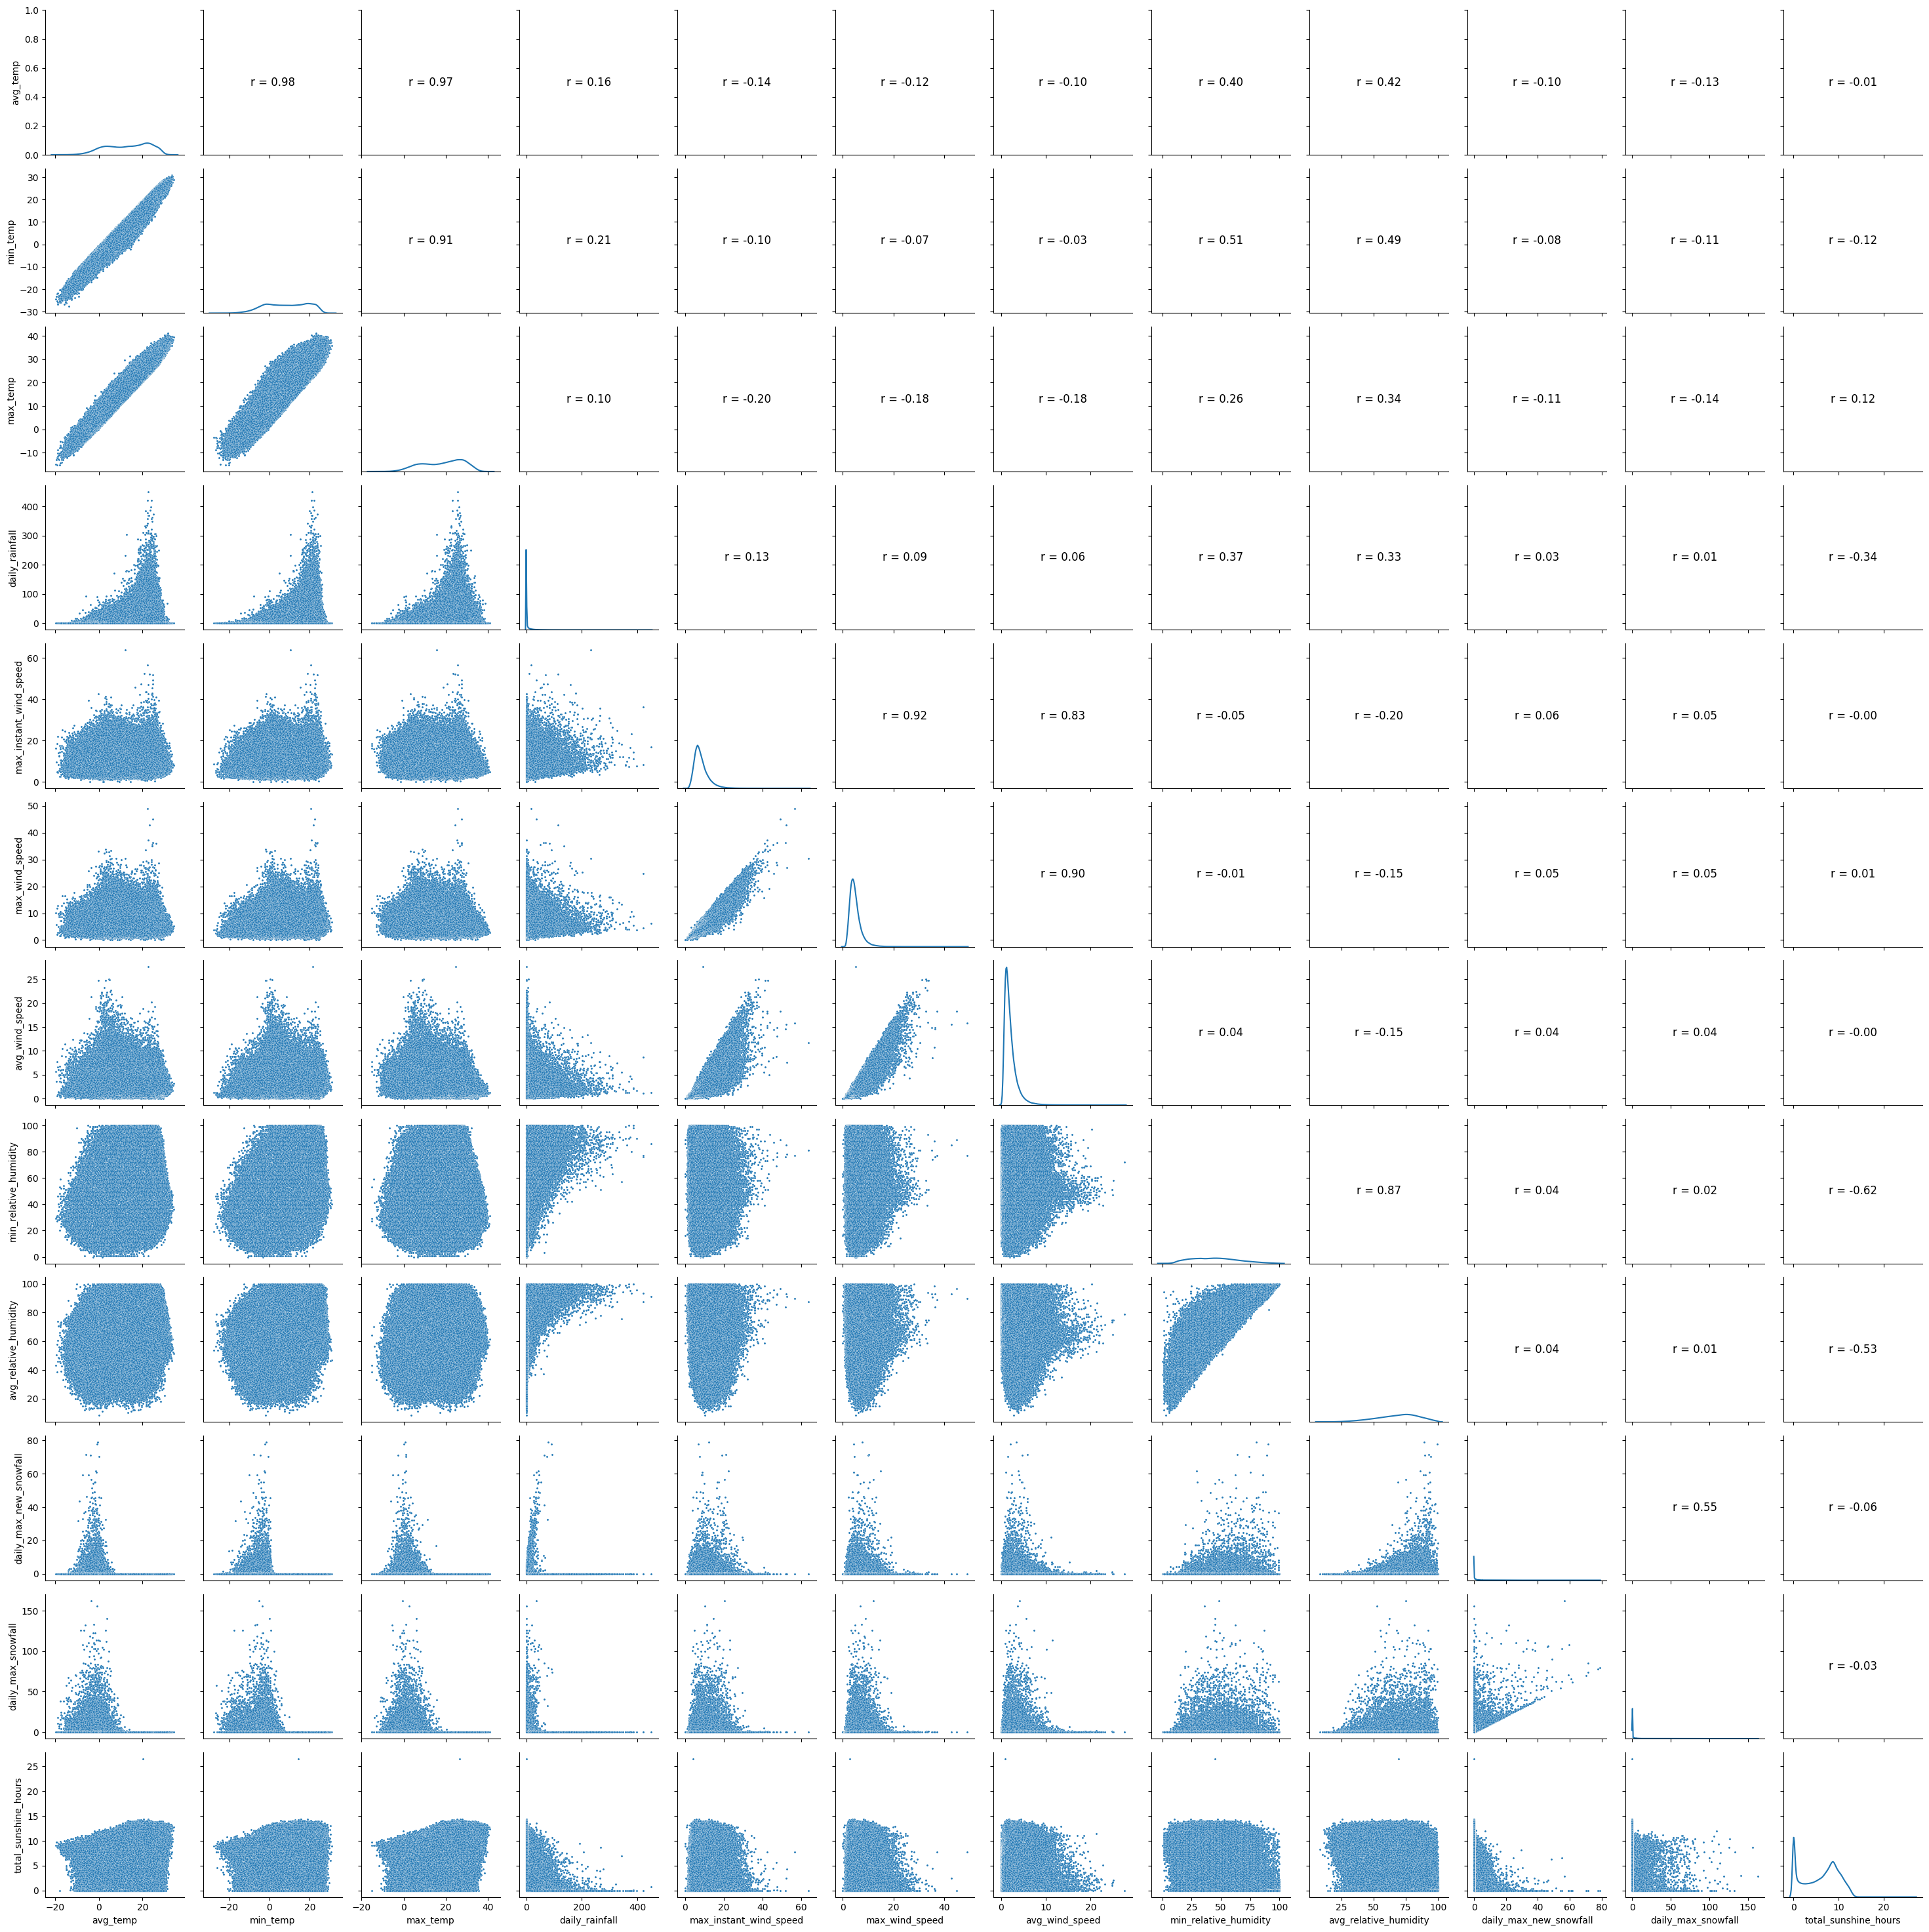

In [ ]:
# 상관관계가 높은 변수는 모델에서 제외

g = sns.PairGrid(model_data)

# 하단 삼각형 부분에 산점도 그리기
g.map_lower(sns.scatterplot, s=5)
# 대각선 부분에 히스토그램 그리기
g.map_diag(sns.kdeplot)
# 상단 삼각형 부분에 상관계수 값 표시
g.map_upper(plot_corr)

plt.show()

In [163]:
model_data.columns

Index(['region_number', 'avg_temp', 'min_temp', 'max_temp', 'daily_rainfall',
       'max_instant_wind_speed', 'max_instant_wind_direction',
       'max_wind_speed', 'max_wind_direction', 'avg_wind_speed',
       'min_relative_humidity', 'avg_relative_humidity',
       'daily_max_new_snowfall', 'daily_max_snowfall', 'total_sunshine_hours',
       'year', 'month'],
      dtype='object')

In [191]:
model_data = model_data.drop(columns=['min_temp', 'max_temp', # avg_temp와 상관관계가 높음
                                    'max_instant_wind_speed', 'max_instant_wind_direction', 'max_wind_speed', 'max_wind_direction', # avg_wind_speed와 상관관계가 높음
                                    'min_relative_humidity'])
model_data.columns

Index(['region_number', 'avg_temp', 'daily_rainfall', 'avg_wind_speed',
       'avg_relative_humidity', 'daily_max_new_snowfall', 'daily_max_snowfall',
       'total_sunshine_hours', 'year', 'month'],
      dtype='object')

### split into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [192]:
# 데이터를 학습 세트와 테스트 세트로 분리

X = model_data.drop(columns=['total_sunshine_hours'], axis=1)
y = model_data['total_sunshine_hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(525866, 9) (131467, 9) (525866,) (131467,)


### train the forest model

In [175]:
# 모델 생성 및 학습
# n_estimators=100 : 트리 개수 지정
# random_state=42 : 재현 가능한 결과를 위한 시드 설정
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### model results

In [194]:
# 특징 중요도 추출
importances = forest_model.feature_importances_

In [ ]:
# 중요도를 데이터프레임으로 변환
feature_importances_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importances_df)

                  feature  importance
2          daily_rainfall    0.357888
4   avg_relative_humidity    0.194914
1                avg_temp    0.149340
0           region_number    0.097258
3          avg_wind_speed    0.084648
7                    year    0.068894
8                   month    0.044404
6      daily_max_snowfall    0.001946
5  daily_max_new_snowfall    0.000708


### prediction and evaluation on training data

In [197]:
from sklearn.metrics import mean_squared_error, r2_score

# 학습 데이터로 예측
y_train_pred = forest_model.predict(X_train)

# 성능 평가
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print(f"학습 데이터 MSE: {mse:.2f}")
print(f"학습 데이터 R2: {r2:.2f}")

학습 데이터 MSE: 0.86
학습 데이터 R2: 0.94


### evaluate performance with new data

In [198]:
# 예측
y_pred_forest = forest_model.predict(X_test)

In [ ]:
# 모델의 성능 평가
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_forest)
r2 = r2_score(y_test, y_pred_forest)
print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R2: {r2:.2f}")

Random Forest MSE: 6.16
Random Forest R2: 0.60


### retrain the Model

* 제거한 변수를 다시 추가하여 모델 생성

In [200]:
# total_sunshine_hours 변수에 결측치가 없는 행만 선택
model_data_all = df_c_tr1tsnc.copy()
model_data_all = model_data_all[~model_data_all['total_sunshine_hours'].isnull()]
model_data_all.isnull().sum()

# 모델에 필요한 변수 선택
model_data_all = model_data_all[['region_number', 'date', 'avg_temp', 'min_temp', 'max_temp','daily_rainfall', 
                           'max_instant_wind_speed', 'max_instant_wind_direction','max_wind_speed', 'max_wind_direction','avg_wind_speed', 
                           'min_relative_humidity','avg_relative_humidity','daily_max_new_snowfall', 'daily_max_snowfall', 'total_sunshine_hours']]

# 연, 월 변수 추가
model_data_all['date'] = pd.to_datetime(model_data_all['date'], format='%Y-%m-%d')
model_data_all['year'] = model_data_all['date'].dt.year
model_data_all['month'] = model_data_all['date'].dt.month

# date 변수 제거
model_data_all.drop(columns=['date'], inplace=True)

# 범주형 변수 변환
col = ['region_number', 'year', 'month','max_instant_wind_direction', 'max_wind_direction']

for c in col:
    model_data_all[c] = model_data_all[c].astype('category')

model_data_all.dtypes

region_number                 category
avg_temp                       float64
min_temp                       float64
max_temp                       float64
daily_rainfall                 float64
max_instant_wind_speed         float64
max_instant_wind_direction    category
max_wind_speed                 float64
max_wind_direction            category
avg_wind_speed                 float64
min_relative_humidity          float64
avg_relative_humidity          float64
daily_max_new_snowfall         float64
daily_max_snowfall             float64
total_sunshine_hours           float64
year                          category
month                         category
dtype: object

In [201]:
X = model_data_all.drop(columns=['total_sunshine_hours'], axis=1)
y = model_data_all['total_sunshine_hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
forest_model_all = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model_all.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [205]:
# 예측
y_pred_forest_all = forest_model_all.predict(X_test)

In [206]:
# 모델의 성능 평가
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_forest)
r2 = r2_score(y_test, y_pred_forest)
print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R2: {r2:.2f}")

Random Forest MSE: 4.34
Random Forest R2: 0.72


## fill missing 'total_sunshine_hours' values with the model

In [213]:
idx = df_c_tr1tsnc[df_c_tr1tsnc['total_sunshine_hours'].isnull()].index
tsh = df_c_tr1tsnc.loc[idx, :]

In [216]:
tsh_data = tsh.copy()
tsh_data = tsh_data[['region_number', 'date', 'avg_temp', 'min_temp', 'max_temp','daily_rainfall', 
                           'max_instant_wind_speed', 'max_instant_wind_direction','max_wind_speed', 'max_wind_direction','avg_wind_speed', 
                           'min_relative_humidity','avg_relative_humidity','daily_max_new_snowfall', 'daily_max_snowfall']]

# 연, 월 변수 추가
tsh_data['date'] = pd.to_datetime(tsh_data['date'], format='%Y-%m-%d')
tsh_data['year'] = tsh_data['date'].dt.year
tsh_data['month'] = tsh_data['date'].dt.month

# date 변수 제거
tsh_data.drop(columns=['date'], inplace=True)

# 범주형 변수 변환
col = ['region_number', 'year', 'month','max_instant_wind_direction', 'max_wind_direction']

for c in col:
    tsh_data[c] = tsh_data[c].astype('category')

tsh_data.dtypes

region_number                 category
avg_temp                       float64
min_temp                       float64
max_temp                       float64
daily_rainfall                 float64
max_instant_wind_speed         float64
max_instant_wind_direction    category
max_wind_speed                 float64
max_wind_direction            category
avg_wind_speed                 float64
min_relative_humidity          float64
avg_relative_humidity          float64
daily_max_new_snowfall         float64
daily_max_snowfall             float64
year                          category
month                         category
dtype: object

In [217]:
predict_tsh = forest_model_all.predict(tsh_data)

In [219]:
tsh_data.index

Index([  2680,   2681,   2682,  35568,  37698,  41359,  89139,  96185,  96186,
        96187,
       ...
       659671, 659672, 659673, 659677, 659679, 659680, 659716, 659718, 659722,
       659723],
      dtype='int64', length=1103)

In [221]:
df_cleaned = df_c_tr1tsnc.copy()
df_cleaned.loc[tsh_data.index, 'total_sunshine_hours'] = predict_tsh

In [222]:
df_cleaned.isnull().sum()

region_number                 0
region_name                   0
date                          0
avg_temp                      0
min_temp                      0
min_temp_time                 0
max_temp                      0
max_temp_time                 0
daily_rainfall                0
max_instant_wind_speed        0
max_instant_wind_direction    0
max_instant_wind_time         0
max_wind_speed                0
max_wind_direction            0
max_wind_time                 0
avg_wind_speed                0
min_relative_humidity         0
avg_relative_humidity         0
total_sunshine_hours          0
daily_max_new_snowfall        0
daily_max_snowfall            0
region                        0
dtype: int64

In [224]:
df_cleaned['total_sunshine_hours'].describe()

count    658436.000000
mean          6.045764
std           3.907134
min           0.000000
25%           2.400000
50%           6.800000
75%           9.200000
max          26.500000
Name: total_sunshine_hours, dtype: float64

## remove outliers from 16 direction data

In [225]:
df_cleaned.describe()

,region_number,avg_temp,min_temp,max_temp,daily_rainfall,max_instant_wind_speed,max_instant_wind_direction,max_wind_speed,max_wind_direction,avg_wind_speed,min_relative_humidity,avg_relative_humidity,total_sunshine_hours,daily_max_new_snowfall,daily_max_snowfall
count,658436.000000,658436.000000,658436.000000,658436.000000,658436.000000,658436.000000,658436.000000,658436.000000,658436.000000,658436.000000,658436.000000,658436.000000,658436.000000,658436.000000,658436.000000
mean,195.758456,13.164989,8.531731,18.537332,3.673530,8.270537,216.763002,4.913572,215.708922,2.079822,44.622882,68.827281,6.045764,0.046952,0.171961
std,64.115263,9.721622,10.339230,9.726697,13.579497,3.582493,101.820349,2.285883,100.483275,1.454775,19.348956,15.697931,3.907134,0.762647,2.152442
min,90.000000,-19.700000,-27.700000,-15.200000,0.000000,0.000000,-60.000000,0.000000,-60.000000,0.000000,0.000000,8.500000,0.000000,0.000000,0.000000
25%,136.000000,5.100000,0.000000,10.500000,0.000000,5.800000,140.000000,3.400000,140.000000,1.100000,29.000000,58.400000,2.400000,0.000000,0.000000
50%,192.000000,14.100000,8.800000,20.000000,0.000000,7.500000,250.000000,4.500000,250.000000,1.700000,44.000000,70.600000,6.800000,0.000000,0.000000
75%,257.000000,21.500000,17.600000,26.600000,0.500000,9.900000,290.000000,5.900000,290.000000,2.600000,58.000000,80.500000,9.200000,0.000000,0.000000
max,296.000000,34.100000,30.900000,41.000000,449.500000,63.700000,450.000000,49.000000,360.000000,27.600000,100.000000,100.000000,26.500000,79.000000,162.800000


### remove negative and over 360 data from '16 direction data'

In [ ]:
idx = df_cleaned[(df_cleaned['max_instant_wind_direction'] <0) | (df_cleaned['max_instant_wind_direction'] >360)].index
idx2 = df_cleaned[(df_cleaned['max_wind_direction'] <0) | (df_cleaned['max_wind_direction'] >360)].index
combined_idx = idx.union(idx2)
df_cleaned_d = df_cleaned.drop(combined_idx)
print(df_cleaned.shape, df_cleaned_d.shape)
idx

Index([228283, 240800, 269478, 293131, 496619], dtype='int64')

### convert 0 to 360

In [252]:
idx = df_cleaned_d[(df_cleaned_d['max_instant_wind_direction'] == 0) | (df_cleaned_d['max_wind_direction'] == 0)].index
df_cleaned_d.loc[idx, 'max_instant_wind_direction'] = 360
df_cleaned_d.loc[idx, 'max_wind_direction'] = 360
df_cleaned_d[['max_instant_wind_direction', 'max_wind_direction']].describe()

,max_instant_wind_direction,max_wind_direction
count,658430.000000,658430.000000
mean,216.770453,215.716386
std,101.816906,100.479715
min,7.800000,20.000000
25%,140.000000,140.000000
50%,250.000000,250.000000
75%,290.000000,290.000000
max,360.000000,360.000000


## create categorical variables

### create a '16 direction' columns
Converting to 16 directions

In [254]:
import numpy as np

In [263]:
df_cate = df_cleaned_d.copy()

In [257]:
np.arange(0, 360+22.5, 22.5)

array([  0. ,  22.5,  45. ,  67.5,  90. , 112.5, 135. , 157.5, 180. ,
       202.5, 225. , 247.5, 270. , 292.5, 315. , 337.5, 360. ])

In [264]:
# 16방위 레이블과 경계값 정의
bins = np.arange(-22.5, 360, 22.5) # 17개의 경계값
labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW'] # 16개의 레이블

# 360도를 0도로 변환
df_cate['max_instant_wind_direction_16'] = pd.cut(df_cate['max_instant_wind_direction'], bins=bins, labels=labels, ordered=False)
df_cate['max_wind_direction_16']= pd.cut(df_cate['max_wind_direction'], bins=bins, labels=labels, ordered=False)

In [265]:
df_cate.groupby('max_instant_wind_direction_16')['max_instant_wind_direction'].max()

C:\Users\xo0ol\AppData\Local\Temp\ipykernel_28992\1042719503.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cate.groupby('max_instant_wind_direction_16')['max_instant_wind_direction'].max()


max_instant_wind_direction_16
N        NaN
NNE     22.5
NE      42.2
ENE     67.3
E       90.0
ESE    110.0
SE     129.3
SSE    150.3
S      180.0
SSW    200.0
SW     222.3
WSW    247.5
W      270.0
WNW    292.5
NW     315.0
NNW    337.3
Name: max_instant_wind_direction, dtype: float64

In [273]:
idx = df_cate[df_cate['max_instant_wind_direction_16'].isnull()]['max_instant_wind_direction'].index
idx2 = df_cate[df_cate['max_wind_direction_16'].isnull()]['max_wind_direction'].index

In [275]:
df_cate.loc[idx, 'max_instant_wind_direction_16'] = 'N'
df_cate.loc[idx2, 'max_wind_direction_16'] = 'N'

In [277]:
df_cate['max_instant_wind_direction_16'].unique()
df_cate['max_wind_direction_16'].unique()

['W', 'SSE', 'WNW', 'N', 'NNE', ..., 'S', 'SSW', 'ESE', 'NW', 'SW']
Length: 14
Categories (16, object): ['N', 'NNE', 'NE', 'ENE', ..., 'W', 'WNW', 'NW', 'NNW']

---

### create a 'time' columns
Converting to time object 

|variable|name|
|--|--|
|최저기온 시각|min_temp_time|
|최고기온 시각|max_temp_time|
최대 순간풍속 시각|max_instant_wind_time
최대 풍속 시각|max_wind_time


In [ ]:
# 작업을 위해 변환 대상이 되는 컬럼을 conv_variable_data 데이터로 추출

conv_variable = ['min_temp_time', 'max_temp_time', 'max_instant_wind_time' ,'max_wind_time' ]
conv_variable_data = df_cate[conv_variable]
conv_variable_data = conv_variable_data.apply(pd.to_numeric)
conv_variable_data.head(3)

,min_temp_time,max_temp_time,max_instant_wind_time,max_wind_time
0,750,1438,2327,518
1,25,1358,1713,1100
2,2400,1416,1155,1200


In [314]:
conv_variable_data.describe()

,min_temp_time,max_temp_time,max_instant_wind_time,max_wind_time
count,658430.000000,658430.00000,658430.000000,658430.000000
mean,914.160433,1339.69814,1320.438323,1326.674217
std,785.995373,339.32684,525.066054,520.998445
min,0.000000,0.00000,0.000000,0.000000
25%,445.000000,1305.00000,1132.000000,1134.000000
50%,608.000000,1418.00000,1408.000000,1415.000000
75%,825.000000,1512.00000,1615.000000,1620.000000
max,2400.000000,2400.00000,2400.000000,2400.000000


In [ ]:
# datetime 포멧에 맞추기 위해 2400을 0으로 변환

conv_variable_data = conv_variable_data.replace(2400, 0)
conv_variable_data.describe()

,min_temp_time,max_temp_time,max_instant_wind_time,max_wind_time
count,658430.000000,658430.000000,658430.000000,658430.000000
mean,879.787759,1339.129514,1318.258592,1321.651360
std,772.629971,339.560382,525.561278,522.194107
min,0.000000,0.000000,0.000000,0.000000
25%,436.000000,1305.000000,1131.000000,1131.000000
50%,604.000000,1418.000000,1408.000000,1414.000000
75%,754.000000,1512.000000,1614.000000,1619.000000
max,2359.000000,2359.000000,2359.000000,2359.000000


In [ ]:
# 0: 남는 자리를 0으로 채우라는 지시자입니다.
# 4: 변환 후 문자열의 전체 길이를 4자리로 맞추라는 의미입니다.
# d: 변수를 10진수(decimal) 정수형으로 처리하라는 타입 지정자입니다.

conv_formatted = conv_variable_data.map(lambda x : f'{x:04d}')
conv_formatted.head(3)

,min_temp_time,max_temp_time,max_instant_wind_time,max_wind_time
0,0750,1438,2327,0518
1,0025,1358,1713,1100
2,0000,1416,1155,1200


In [333]:
conv_formatted['max_instant_wind_time'] = pd.to_datetime(conv_formatted['max_instant_wind_time'], format='%H%M')
conv_formatted['max_temp_time'] = pd.to_datetime(conv_formatted['max_temp_time'], format='%H%M')
conv_formatted['max_wind_time'] = pd.to_datetime(conv_formatted['max_wind_time'], format='%H%M')
conv_formatted['min_temp_time'] = pd.to_datetime(conv_formatted['min_temp_time'], format='%H%M')

In [323]:
conv_formatted.dtypes

min_temp_time            datetime64[ns]
max_temp_time            datetime64[ns]
max_instant_wind_time    datetime64[ns]
max_wind_time            datetime64[ns]
dtype: object

In [324]:
conv_formatted.head(3)

,min_temp_time,max_temp_time,max_instant_wind_time,max_wind_time
0,1900-01-01 07:50:00,1900-01-01 14:38:00,1900-01-01 23:27:00,1900-01-01 05:18:00
1,1900-01-01 00:25:00,1900-01-01 13:58:00,1900-01-01 17:13:00,1900-01-01 11:00:00
2,1900-01-01 00:00:00,1900-01-01 14:16:00,1900-01-01 11:55:00,1900-01-01 12:00:00


In [334]:
# 범주로 지정할 hour과 새 범주명 정의

bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
labels = ['00:01-03:00', '03:01-06:00', '06:01-09:00',
          '09:01-12:00', '12:01-15:00', '15:01-18:00',
          '18:01-21:00', '21:01-24:00']

In [ ]:
# 범주 컬럼 추가

conv_formatted['min_temp_hour'] = pd.cut(conv_formatted['min_temp_time'].dt.hour, bins=bins, labels=labels, right=True, include_lowest=True)
conv_formatted['max_temp_hour'] = pd.cut(conv_formatted['max_temp_time'].dt.hour, bins=bins, labels=labels, right=True, include_lowest=True)
conv_formatted['max_wind_hour'] = pd.cut(conv_formatted['max_wind_time'].dt.hour, bins=bins, labels=labels, right=True, include_lowest=True)
conv_formatted['max_instant_wind_hour'] = pd.cut(conv_formatted['max_instant_wind_time'].dt.hour, bins=bins, labels=labels, right=True, include_lowest=True)
conv_formatted.head(3)

,min_temp_time,max_temp_time,max_instant_wind_time,max_wind_time,min_temp_hour,max_temp_hour,max_wind_hour,max_instant_wind_hour
0,1900-01-01 07:50:00,1900-01-01 14:38:00,1900-01-01 23:27:00,1900-01-01 05:18:00,06:01-09:00,12:01-15:00,03:01-06:00,21:01-24:00
1,1900-01-01 00:25:00,1900-01-01 13:58:00,1900-01-01 17:13:00,1900-01-01 11:00:00,00:01-03:00,12:01-15:00,09:01-12:00,15:01-18:00
2,1900-01-01 00:00:00,1900-01-01 14:16:00,1900-01-01 11:55:00,1900-01-01 12:00:00,00:01-03:00,12:01-15:00,09:01-12:00,09:01-12:00


In [337]:
df_conv_time = df_cate.copy()

In [ ]:
# 범주 데이터를 원본 데이터에 병합

concat_variables = ['min_temp_hour', 'max_temp_hour' ,'max_wind_hour', 'max_instant_wind_hour']
df_merged_hour = pd.concat([df_conv_time, conv_formatted[concat_variables]], axis = 1)
df_merged_hour.head(3)

,region_number,region_name,date,avg_temp,min_temp,min_temp_time,max_temp,max_temp_time,daily_rainfall,max_instant_wind_speed,...,total_sunshine_hours,daily_max_new_snowfall,daily_max_snowfall,region,max_instant_wind_direction_16,max_wind_direction_16,min_temp_hour,max_temp_hour,max_wind_hour,max_instant_wind_hour
0,90,속초,2005-01-01,-2.4,-7.6,750,2.8,1438,0.0,6.9,...,7.8,0.0,2.5,강원특별자치도,W,W,06:01-09:00,12:01-15:00,03:01-06:00,21:01-24:00
1,90,속초,2005-01-02,2.9,-3.3,25,6.1,1358,0.0,16.1,...,8.1,0.0,0.0,강원특별자치도,W,W,00:01-03:00,12:01-15:00,09:01-12:00,15:01-18:00
2,90,속초,2005-01-03,5.3,1.0,2400,9.8,1416,0.1,17.3,...,2.9,0.0,0.0,강원특별자치도,WNW,W,00:01-03:00,12:01-15:00,09:01-12:00,09:01-12:00


In [341]:
conv_formatted_drophour = conv_formatted.drop(columns=concat_variables, axis=1)
conv_formatted_drophour.head(3)

,min_temp_time,max_temp_time,max_instant_wind_time,max_wind_time
0,1900-01-01 07:50:00,1900-01-01 14:38:00,1900-01-01 23:27:00,1900-01-01 05:18:00
1,1900-01-01 00:25:00,1900-01-01 13:58:00,1900-01-01 17:13:00,1900-01-01 11:00:00
2,1900-01-01 00:00:00,1900-01-01 14:16:00,1900-01-01 11:55:00,1900-01-01 12:00:00


In [ ]:
# 기존 0000 형식의 시간 데이터를 00:00:00 형식의 문자열로 변환

conv_formatted_time = conv_formatted_drophour.map(lambda x : x.strftime('%H:%M:%S'))
conv_formatted_time.head(3)

,min_temp_time,max_temp_time,max_instant_wind_time,max_wind_time
0,07:50:00,14:38:00,23:27:00,05:18:00
1,00:25:00,13:58:00,17:13:00,11:00:00
2,00:00:00,14:16:00,11:55:00,12:00:00


In [ ]:
# 원본 데이터 수정

for x in conv_variable:
    df_merged_hour[x] = conv_formatted_time[x]

df_merged_hour.head(3)

,region_number,region_name,date,avg_temp,min_temp,min_temp_time,max_temp,max_temp_time,daily_rainfall,max_instant_wind_speed,...,total_sunshine_hours,daily_max_new_snowfall,daily_max_snowfall,region,max_instant_wind_direction_16,max_wind_direction_16,min_temp_hour,max_temp_hour,max_wind_hour,max_instant_wind_hour
0,90,속초,2005-01-01,-2.4,-7.6,07:50:00,2.8,14:38:00,0.0,6.9,...,7.8,0.0,2.5,강원특별자치도,W,W,06:01-09:00,12:01-15:00,03:01-06:00,21:01-24:00
1,90,속초,2005-01-02,2.9,-3.3,00:25:00,6.1,13:58:00,0.0,16.1,...,8.1,0.0,0.0,강원특별자치도,W,W,00:01-03:00,12:01-15:00,09:01-12:00,15:01-18:00
2,90,속초,2005-01-03,5.3,1.0,00:00:00,9.8,14:16:00,0.1,17.3,...,2.9,0.0,0.0,강원특별자치도,WNW,W,00:01-03:00,12:01-15:00,09:01-12:00,09:01-12:00


In [344]:
df_merged_hour[conv_variable].head(3)

,min_temp_time,max_temp_time,max_instant_wind_time,max_wind_time
0,07:50:00,14:38:00,23:27:00,05:18:00
1,00:25:00,13:58:00,17:13:00,11:00:00
2,00:00:00,14:16:00,11:55:00,12:00:00


### create a 'date' columns

Converting to date object 

In [347]:
df_date_set = df_merged_hour.copy()

In [348]:
df_date_set['date'] = pd.to_datetime(df_date_set['date'], format='%Y-%m-%d')
df_date_set['date'].head(3)

0   2005-01-01
1   2005-01-02
2   2005-01-03
Name: date, dtype: datetime64[ns]

In [349]:
df_date_set['date_year'] = df_date_set['date'].dt.year
df_date_set['date_month'] = df_date_set['date'].dt.month
df_date_set['date_day'] = df_date_set['date'].dt.day

In [354]:
df_date_set.head(3)

,region_number,region_name,date,avg_temp,min_temp,min_temp_time,max_temp,max_temp_time,daily_rainfall,max_instant_wind_speed,...,region,max_instant_wind_direction_16,max_wind_direction_16,min_temp_hour,max_temp_hour,max_wind_hour,max_instant_wind_hour,date_year,date_month,date_day
0,90,속초,2005-01-01,-2.4,-7.6,07:50:00,2.8,14:38:00,0.0,6.9,...,강원특별자치도,W,W,06:01-09:00,12:01-15:00,03:01-06:00,21:01-24:00,2005,1,1
1,90,속초,2005-01-02,2.9,-3.3,00:25:00,6.1,13:58:00,0.0,16.1,...,강원특별자치도,W,W,00:01-03:00,12:01-15:00,09:01-12:00,15:01-18:00,2005,1,2
2,90,속초,2005-01-03,5.3,1.0,00:00:00,9.8,14:16:00,0.1,17.3,...,강원특별자치도,WNW,W,00:01-03:00,12:01-15:00,09:01-12:00,09:01-12:00,2005,1,3


### create a 'season' column

In [372]:
df_season = df_date_set.copy()

In [373]:
bins = [0, 2, 5, 8, 11, 12]
labels = ['winter', 'spring', 'summer', 'autumn', 'winter']

In [374]:
df_season['season'] = pd.cut(df_season['date_month'], bins=bins, labels=labels, ordered=False)

In [ ]:
# df_season['date_month'] = df_season['date_month'].astype('category')

In [375]:
df_season.groupby('season')['date_month'].unique()

C:\Users\xo0ol\AppData\Local\Temp\ipykernel_28992\657524887.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_season.groupby('season')['date_month'].unique()


season
autumn    [9, 10, 11]
spring      [3, 4, 5]
summer      [6, 7, 8]
winter     [1, 2, 12]
Name: date_month, dtype: object

create 'district' columns

In [ ]:
import pandas as pd

---

# save dataset

In [376]:
df_season.isnull().sum()

region_number                    0
region_name                      0
date                             0
avg_temp                         0
min_temp                         0
min_temp_time                    0
max_temp                         0
max_temp_time                    0
daily_rainfall                   0
max_instant_wind_speed           0
max_instant_wind_direction       0
max_instant_wind_time            0
max_wind_speed                   0
max_wind_direction               0
max_wind_time                    0
avg_wind_speed                   0
min_relative_humidity            0
avg_relative_humidity            0
total_sunshine_hours             0
daily_max_new_snowfall           0
daily_max_snowfall               0
region                           0
max_instant_wind_direction_16    0
max_wind_direction_16            0
min_temp_hour                    0
max_temp_hour                    0
max_wind_hour                    0
max_instant_wind_hour            0
date_year           

In [377]:
df_season.to_csv('../data/korea_temp_cleaned.csv', index=False)

---